Tutorial - Part #4 - Image Subtraction
=====================

For image subtraction the package has a module called `propersubtract`, which implements a main `diff` function.


In [1]:
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [2]:
from astropy.visualization import LinearStretch, LogStretch
from astropy.visualization import ZScaleInterval, MinMaxInterval
from astropy.visualization import ImageNormalize

In [3]:
import properimage.single_image as si
import properimage.propersubtract as ps

In [4]:
ref_path = './../../../data/aligned_eso085-030-004.fit'
new_path = './../../../data/aligned_eso085-030-005.fit'

To get the subtraction we need to run this function by using both paths for example:

In [21]:
result = ps.diff(ref=ref_path, new=new_path, align=False, iterative=False, beta=False)

Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
('Masked pixels: ', 180)
S_corr sigma_clipped_stats 
mean = -1.00860590569e-05, median = -3.56692269432e-06, std = 0.000276636902297

Subtraction performed in 5.06378102303 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

In [22]:
D = result[0]
P = result[1]
Scorr = result[2]
mask = result[3]

In [23]:
palette = copy(plt.cm.gray)
palette.set_bad('r', alpha=1)
#palette.set_under('k', 1.0)
#palette.set_over('w', 1.0)

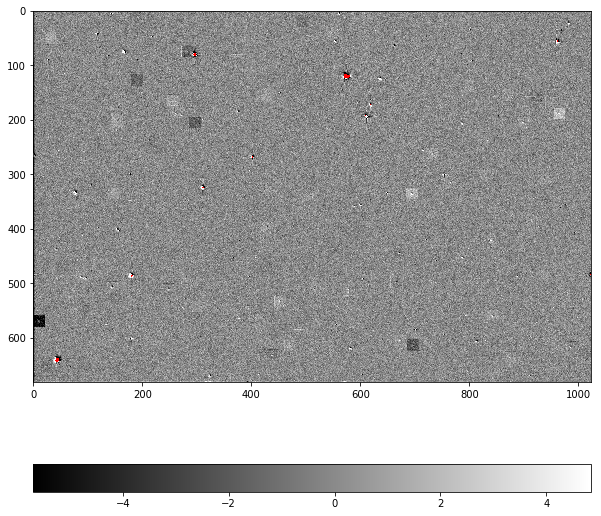

In [24]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(10, 10))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

This is related to the quantities derived in Zackay et al. works. 
$S_{corr} = \overbar{P_D} \otimes D$

In [25]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, align=False, iterative=False, beta=True)

Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
('Masked pixels: ', 180)
Found that beta = [ 1.01935136  0.07797519 -0.05997117]
Took only 35.6876199245 awesome seconds
The solution was with cost 0.0345686740543
S_corr sigma_clipped_stats 
mean = -1.44925115542e-05, median = -5.20775192037e-06, std = 0.000263424958117

Subtraction performed in 40.8885319233 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

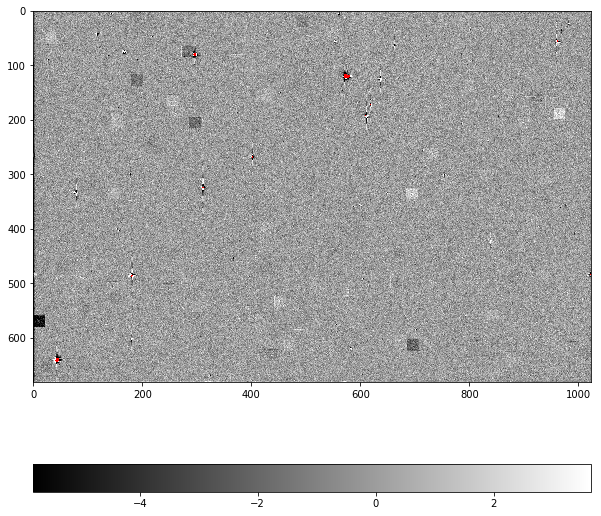

In [26]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(10, 10))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

We have the option of using the iterative methods without beta

In [27]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, align=False, iterative=True, beta=False)

Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
('Masked pixels: ', 180)
S_corr sigma_clipped_stats 
mean = -1.00860590569e-05, median = -3.56692269432e-06, std = 0.000276636902297

Subtraction performed in 4.98641204834 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

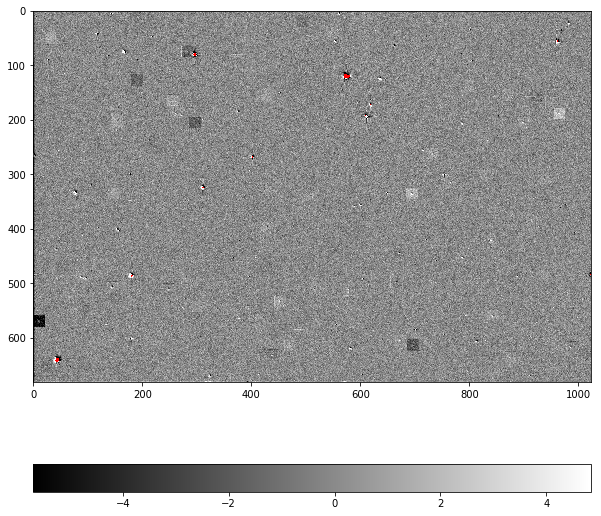

In [28]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(10, 10))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

We have the option of using the iterative methods without beta

In [29]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, align=False, iterative=True, beta=True, shift=True)

Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
('Masked pixels: ', 180)
Found that beta = [ 1.01935136  0.07797519 -0.05997117]
Took only 33.4636099339 awesome seconds
The solution was with cost 0.0345686740543
S_corr sigma_clipped_stats 
mean = -1.44925115542e-05, median = -5.20775192037e-06, std = 0.000263424958117

Subtraction performed in 38.373857975 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

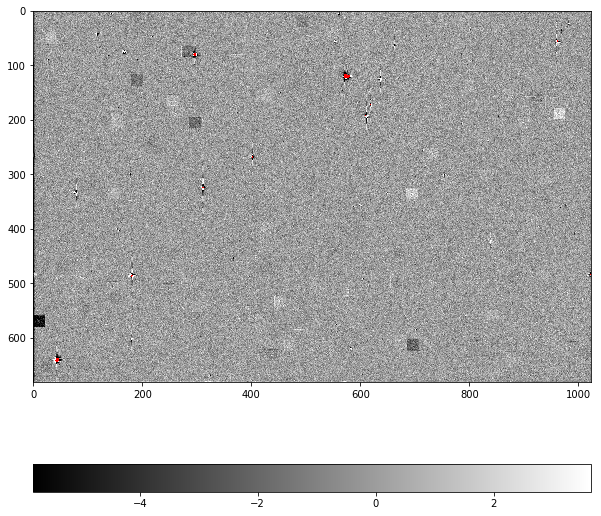

In [30]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(10, 10))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')